In [22]:
from pathlib import Path
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
root_dir = Path("../OneHand10K")
image_dir = root_dir / "Train/source"
mask_dir = root_dir / "Train/mask"

In [4]:
with open(root_dir / "Train/label_joint.txt", "r") as f:
    data = f.read().strip().split("\n")
    data = [line.split(',') for line in data]

In [5]:
annotations = {
    d[0]: {
        "image_path" : str(image_dir / d[0]),
        "mask_path" : str(mask_dir / d[0].replace('.jpg', '.png')),
        "width": int(d[1]),
        "height": int(d[2]),
        "hand_number": int(d[3]),
        "keypoints": [[int(d[i]), int(d[i + 1])] for i in range(4, len(d), 2)]
    } for d in data
}

In [6]:
annotations['1.jpg']

{'image_path': '../OneHand10K/Train/source/1.jpg',
 'mask_path': '../OneHand10K/Train/mask/1.png',
 'width': 226,
 'height': 222,
 'hand_number': 1,
 'keypoints': [[135, 187],
  [187, 148],
  [201, 129],
  [205, 108],
  [174, 89],
  [142, 83],
  [148, 70],
  [159, 57],
  [167, 86],
  [132, 82],
  [134, 64],
  [143, 30],
  [151, 3],
  [107, 83],
  [108, 59],
  [104, 33],
  [108, 4],
  [91, 98],
  [82, 75],
  [81, 56],
  [81, 38]]}

In [35]:
def find_bbox(image_name):
    anno = annotations[image_name]
    mask = cv2.imread(anno["mask_path"], cv2.IMREAD_GRAYSCALE)

    if mask is None:
        print(f"Error loading mask for {image_name}")
        return None

    print(mask.max())
    print(np.unique(mask))

    # mask[mask != 255] = 0  # Ensure mask is binary
    
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"No contours found for {image_name}")
        return None
    
    # Get bounding boxes for all contours
    print(contours)
    bboxes = [cv2.boundingRect(cnt) for cnt in contours]

    print(bboxes)

    if not bboxes:
        return None
    x_min = min([x for x, y, w, h in bboxes])
    y_min = min([y for x, y, w, h in bboxes])
    x_max = max([x + w for x, y, w, h in bboxes])
    y_max = max([y + h for x, y, w, h in bboxes])

    bbox_width = x_max - x_min
    bbox_height = y_max - y_min

    scale = 0  # Padding scale
    padd_width = int(scale * bbox_width)
    padd_height = int(scale * bbox_height)

    x_min = max(0, x_min - padd_width)
    y_min = max(0, y_min - padd_height)
    x_max = min(anno["width"] - 1, x_max + padd_width)
    y_max = min(anno["height"] - 1, y_max + padd_height)

    # Return as (x, y, w, h)
    return (x_min, y_min, x_max - x_min, y_max - y_min)

def visualize_sample(image_name, bbox=None):
    # Load the image and mask
    anno = annotations[image_name]
    image = cv2.imread(anno["image_path"])
    # print(image.shape, anno["width"], anno["height"])
    print(f"Visualizing {image_name} with bbox: {bbox}")
    mask = cv2.imread(anno["mask_path"], cv2.IMREAD_GRAYSCALE)
    if image is None or mask is None:
        print(f"Error loading image or mask for {image_name}")
        return
    
    keypoints = anno["keypoints"]
    for (x, y) in keypoints:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

    if bbox is not None:
        x, y, w, h = bbox
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis("off")

    plt.show()

255
[  0 235 236 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255]
(array([[[ 80,  32]],

       [[ 79,  33]],

       [[ 56,  33]],

       [[ 55,  34]],

       [[ 51,  34]],

       [[ 50,  35]],

       [[ 42,  35]],

       [[ 41,  36]],

       [[ 38,  36]],

       [[ 37,  37]],

       [[ 36,  37]],

       [[ 35,  38]],

       [[ 35,  42]],

       [[ 36,  43]],

       [[ 37,  43]],

       [[ 38,  44]],

       [[ 38,  46]],

       [[ 36,  48]],

       [[ 36,  54]],

       [[ 34,  56]],

       [[ 33,  56]],

       [[ 32,  55]],

       [[ 29,  55]],

       [[ 28,  56]],

       [[ 27,  56]],

       [[ 26,  57]],

       [[ 25,  57]],

       [[ 24,  58]],

       [[ 23,  58]],

       [[ 22,  59]],

       [[ 21,  59]],

       [[ 20,  60]],

       [[ 19,  60]],

       [[ 17,  62]],

       [[ 17,  65]],

       [[ 18,  66]],

       [[ 18,  68]],

       [[ 19,  69]],

       [[ 20,  69]],

       [[ 21,  70]],

       [[ 23,  70]],

       [[ 

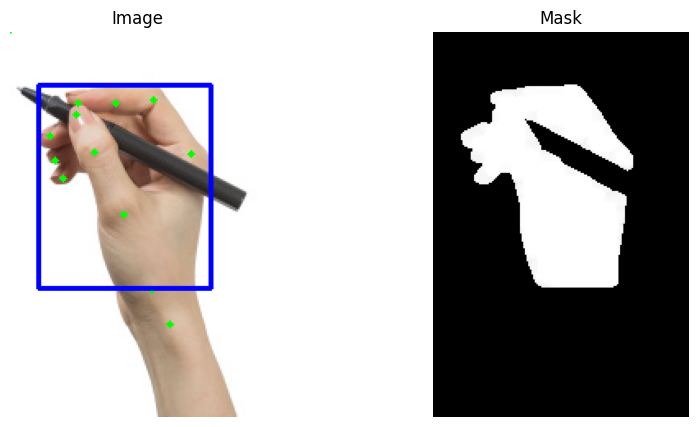

In [36]:
# for i in range(1, 20):
#     image_name = f'{i}.jpg'  # Change this to visualize different images
#     visualize_sample(image_name, find_bbox(image_name))

image_name = '5339.jpg'  # Example image name
visualize_sample(image_name, find_bbox(image_name))